In [89]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns

In [91]:
import warnings
warnings.filterwarnings('ignore')

In [92]:
df = pd.read_csv('Chocolate Sales.csv')

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Sales Person   1094 non-null   object
 1   Country        1094 non-null   object
 2   Product        1094 non-null   object
 3   Date           1094 non-null   object
 4   Amount         1094 non-null   object
 5   Boxes Shipped  1094 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 51.4+ KB


In [94]:
df.describe()

,Boxes Shipped
count,1094.000000
mean,161.797989
std,121.544145
min,1.000000
25%,70.000000
50%,135.000000
75%,228.750000
max,709.000000


In [95]:
df.select_dtypes(include = object).describe()

,Sales Person,Country,Product,Date,Amount
count,1094,1094,1094,1094,1094
unique,25,6,22,168,827
top,Kelci Walkden,Australia,50% Dark Bites,13-Jan-22,"$2,317"
freq,54,205,60,16,5


In [96]:
df['Amount'] = df['Amount'].replace({'\$' : '', ',' : ''}, regex = True)
df['Amount'] = df['Amount'].astype(int)

In [97]:
df['Date'] = pd.to_datetime(df['Date'])
df['Date'].head()

0   2022-01-04
1   2022-08-01
2   2022-07-07
3   2022-04-27
4   2022-02-24
Name: Date, dtype: datetime64[ns]

In [101]:
df.drop(['Date'], axis = 1, inplace = True)

In [102]:
df.head(20)

,Sales Person,Country,Product,Amount,Boxes Shipped
0,Jehu Rudeforth,UK,Mint Chip Choco,5320,180
1,Van Tuxwell,India,85% Dark Bars,7896,94
2,Gigi Bohling,India,Peanut Butter Cubes,4501,91
3,Jan Morforth,Australia,Peanut Butter Cubes,12726,342
4,Jehu Rudeforth,UK,Peanut Butter Cubes,13685,184
5,Van Tuxwell,India,Smooth Sliky Salty,5376,38
6,Oby Sorrel,UK,99% Dark & Pure,13685,176
7,Gunar Cockshoot,Australia,After Nines,3080,73
8,Jehu Rudeforth,New Zealand,50% Dark Bites,3990,59
9,Brien Boise,Australia,99% Dark & Pure,2835,102


In [103]:
df['Sales Person'].unique()

array(['Jehu Rudeforth', 'Van Tuxwell', 'Gigi Bohling', 'Jan Morforth',
       'Oby Sorrel', 'Gunar Cockshoot', 'Brien Boise',
       'Rafaelita Blaksland', 'Barr Faughny', 'Mallorie Waber',
       'Karlen McCaffrey', "Marney O'Breen", 'Beverie Moffet',
       'Roddy Speechley', 'Curtice Advani', 'Husein Augar', 'Kaine Padly',
       'Dennison Crosswaite', "Wilone O'Kielt", 'Andria Kimpton',
       'Kelci Walkden', 'Camilla Castle', 'Madelene Upcott',
       'Dotty Strutley', 'Ches Bonnell'], dtype=object)

# Sales Performance Analysis Based on Sales Person

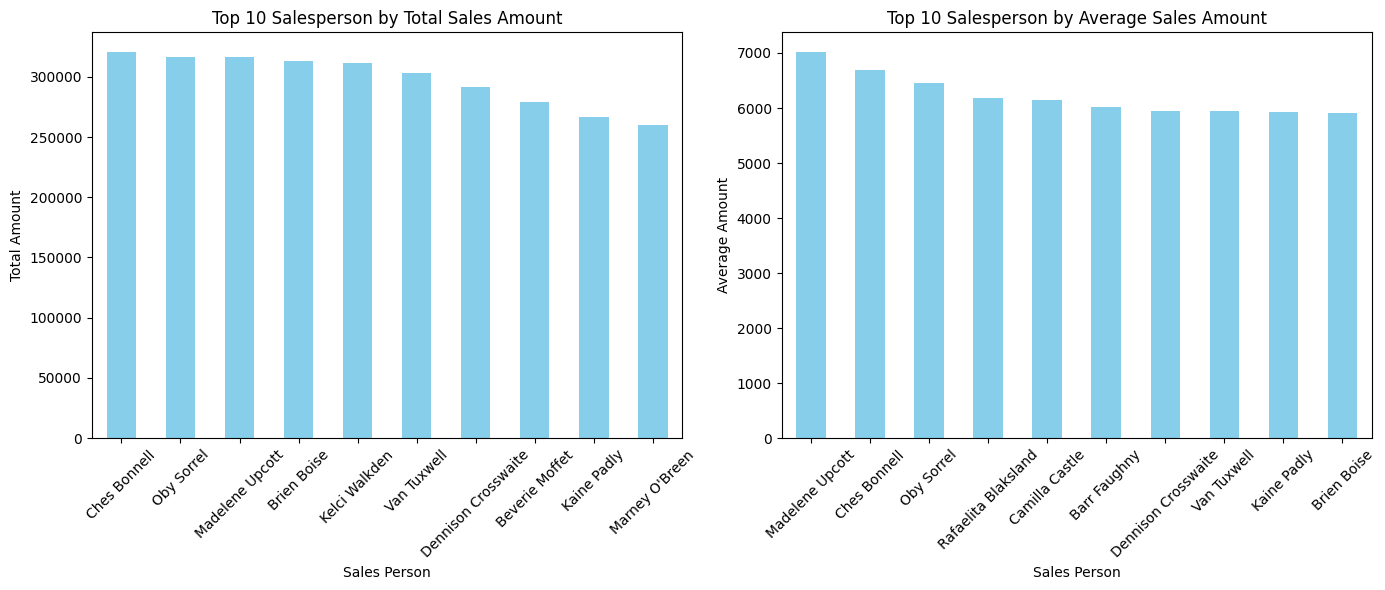

In [111]:
top_10_sales = df.groupby('Sales Person')['Amount'].sum().sort_values(ascending = False).head(10)
top_10_average_sales = df.groupby('Sales Person')['Amount'].mean().sort_values(ascending = False).head(10)
sales_ranking_shipped_amount = df.groupby('Sales Person')['Boxes Shipped'].sum().sort_values(ascending = False)

fig, axes = plt.subplots(1, 2, figsize = (14, 6))

top_10_sales.plot(kind = 'bar', ax = axes[0], color = 'skyblue')
axes[0].set_title('Top 10 Salesperson by Total Sales Amount')
axes[0].set_xlabel('Sales Person')
axes[0].set_ylabel('Total Amount')
axes[0].tick_params(axis = 'x', rotation = 45)

top_10_average_sales.plot(kind = 'bar', ax = axes[1], color = 'skyblue')
axes[1].set_title('Top 10 Salesperson by Average Sales Amount')
axes[1].set_xlabel('Sales Person')
axes[1].set_ylabel('Average Amount')
axes[1].tick_params(axis = 'x', rotation = 45)

plt.tight_layout()
plt.show()

In [112]:
print(sales_ranking_shipped_amount)

Sales Person
Karlen McCaffrey       9658
Beverie Moffet         9214
Dennison Crosswaite    8767
Kelci Walkden          8702
Oby Sorrel             8608
Brien Boise            8102
Marney O'Breen         8043
Jan Morforth           7661
Ches Bonnell           7522
Madelene Upcott        7279
Kaine Padly            7253
Jehu Rudeforth         7246
Curtice Advani         7074
Roddy Speechley        6899
Dotty Strutley         6853
Van Tuxwell            6799
Gunar Cockshoot        6677
Andria Kimpton         6448
Barr Faughny           6366
Gigi Bohling           6303
Mallorie Waber         5980
Husein Augar           5849
Camilla Castle         5374
Rafaelita Blaksland    4297
Wilone O'Kielt         4033
Name: Boxes Shipped, dtype: int64


# Sales Analysis by Product

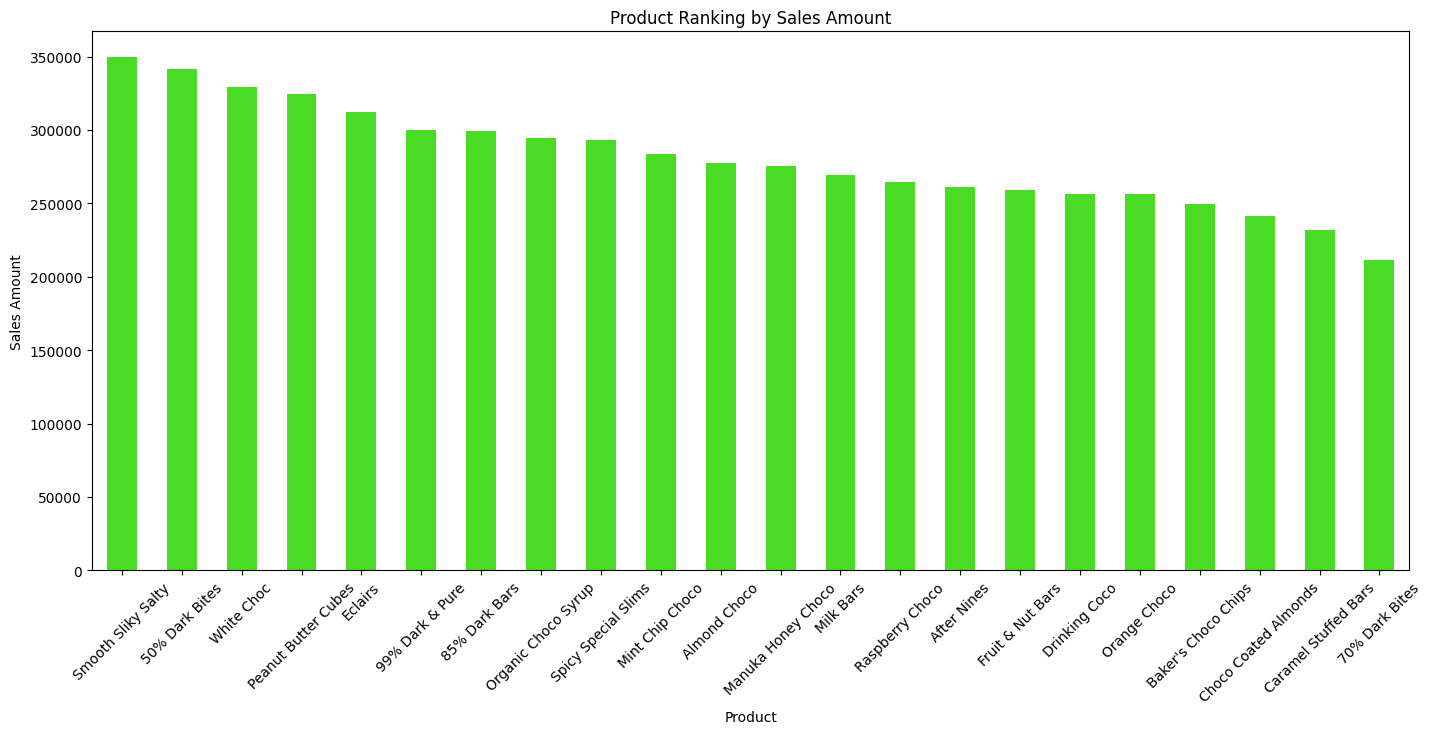

In [113]:
product_ranking_by_amount = df.groupby('Product')['Amount'].sum().sort_values(ascending = False)
product_ranking_by_shipped = df.groupby('Product')['Boxes Shipped'].sum().sort_values(ascending = False)

plt.figure(figsize = (17, 7))
product_ranking_by_amount.plot(kind = 'bar', color = '#4adb25')
plt.title('Product Ranking by Sales Amount')
plt.xlabel('Product')
plt.ylabel('Sales Amount')
plt.xticks(rotation = 45)
plt.show()

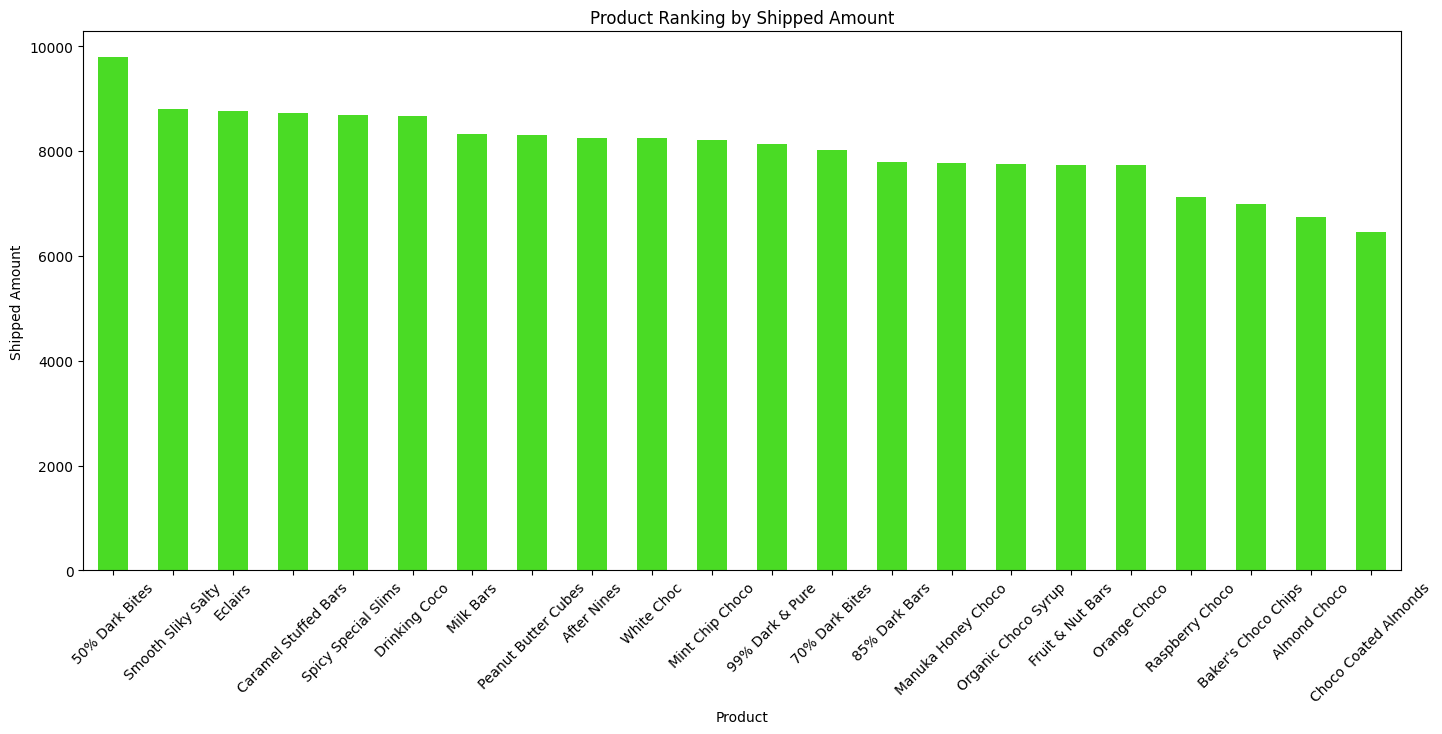

In [114]:
plt.figure(figsize = (17, 7))
product_ranking_by_shipped.plot(kind = 'bar', color = '#4adb25')
plt.title('Product Ranking by Shipped Amount')
plt.xlabel('Product')
plt.ylabel('Shipped Amount')
plt.xticks(rotation=45)
plt.show()

# Sales Analysis by Country

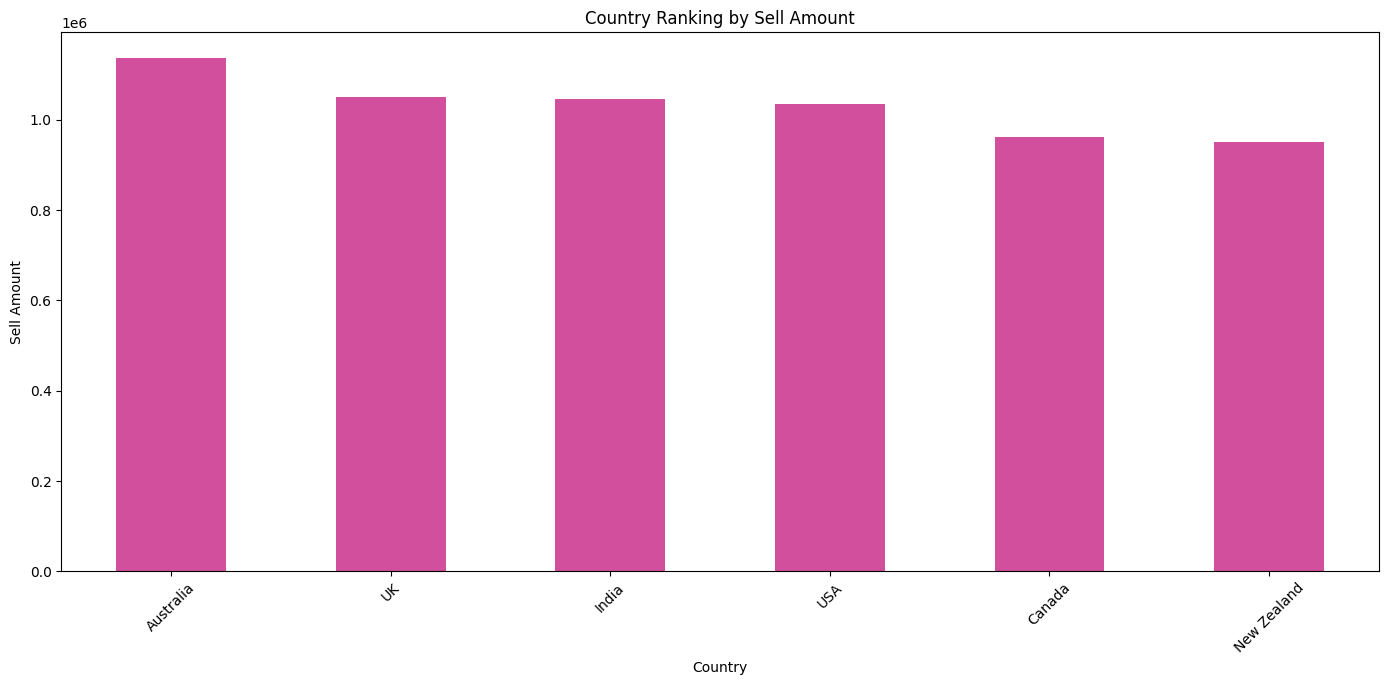

In [115]:
country_ranking_sell_amount = df.groupby('Country')['Amount'].sum().sort_values(ascending = False)

plt.figure(figsize = (17, 7))
country_ranking_sell_amount.plot(kind = 'bar', color = '#d14f9d')
plt.title('Country Ranking by Sell Amount')
plt.xlabel('Country')
plt.ylabel('Sell Amount')
plt.xticks(rotation = 45)
plt.show()

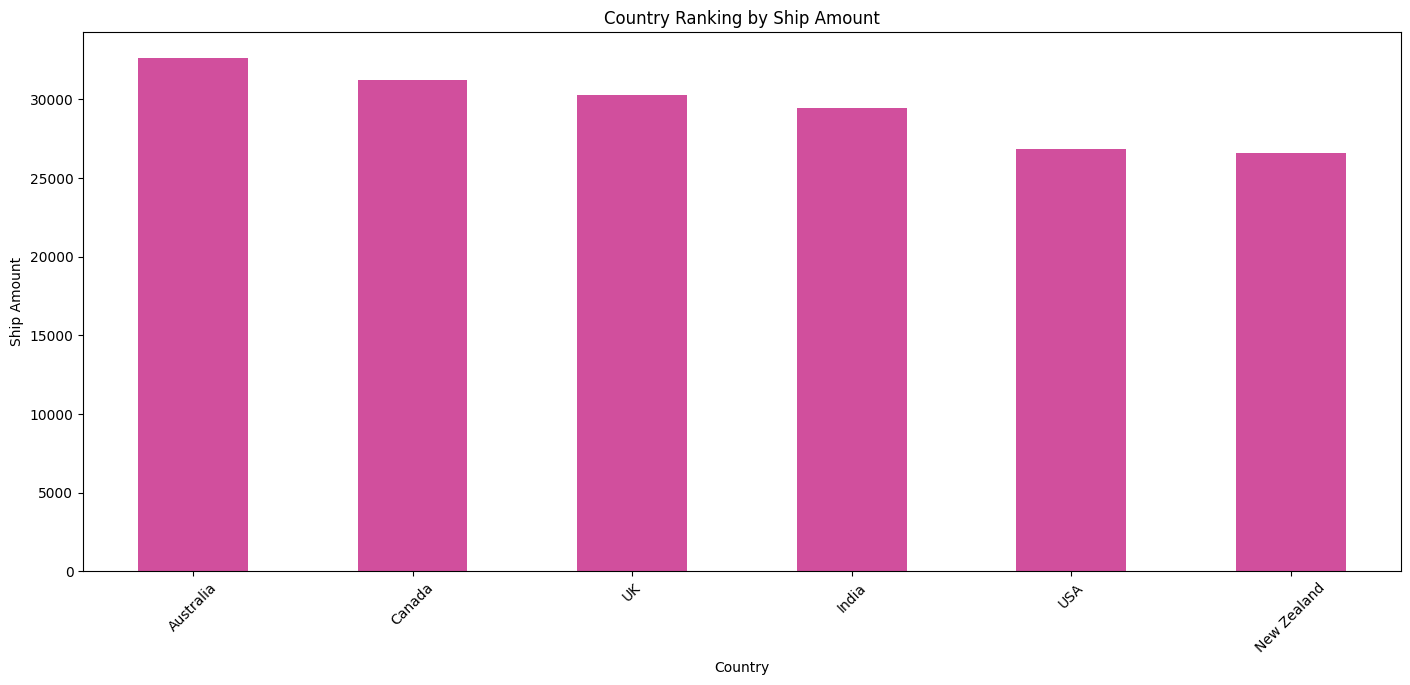

In [116]:
country_ranking_ship_amount = df.groupby('Country')['Boxes Shipped'].sum().sort_values(ascending = False)

plt.figure(figsize = (17, 7))
country_ranking_ship_amount.plot(kind = 'bar', color = '#d14f9d')
plt.title('Country Ranking by Ship Amount')
plt.xlabel('Country')
plt.ylabel('Ship Amount')
plt.xticks(rotation = 45)
plt.show()

# Identify Favorite Products

In [110]:
top_products = df.groupby('Product').agg({'Amount' : 'sum', 'Boxes Shipped' : 'sum'}).sort_values(by = 'Amount', ascending = False)

print(top_products)

                      Amount  Boxes Shipped
Product                                    
Smooth Sliky Salty    349692           8810
50% Dark Bites        341712           9792
White Choc            329147           8240
Peanut Butter Cubes   324842           8304
Eclairs               312445           8757
99% Dark & Pure       299796           8127
85% Dark Bars         299229           7793
Organic Choco Syrup   294700           7749
Spicy Special Slims   293454           8685
Mint Chip Choco       283969           8207
Almond Choco          277536           6736
Manuka Honey Choco    275541           7781
Milk Bars             269248           8330
Raspberry Choco       264740           7115
After Nines           261331           8257
Fruit & Nut Bars      259147           7738
Drinking Coco         256655           8660
Orange Choco          256144           7732
Baker's Choco Chips   249613           6998
Choco Coated Almonds  241486           6464
Caramel Stuffed Bars  231588    